In [2]:
from simpletransformers.question_answering import QuestionAnsweringModel


C:\Users\shrik\dl-assignment-1\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
from IPython.display import Image

In [10]:
model_type = "albert"
model_name = "albert-base-v2"

In [11]:
train_args = {
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "use_cached_eval_features": True,
    "output_dir": f"outputs/{model_type}",
    "best_model_dir": f"outputs/{model_type}/best_model",
    "evaluate_during_training": True,
    "max_seq_length": 128,
    "num_train_epochs": 1,
    "evaluate_during_training_steps": 1000,
    "wandb_project": "Question Answer Application",
    "wandb_kwargs": {"name": model_name},
    "save_model_every_epoch": False,
    "save_eval_checkpoints": False,
    "n_best_size":3,
    "train_batch_size": 8,
    "eval_batch_size": 4,
}

In [6]:
import json

In [7]:
with open('formatted_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [8]:
len(data)

160869

In [14]:
with open('formatted_dev.json', 'r', encoding='utf-8') as file:
    test_data = json.load(file)

In [12]:
model = QuestionAnsweringModel(
    "albert", "albert-base-v2",args = train_args, use_cuda=False
)

Some weights of AlbertForQuestionAnswering were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
model.train_model(train_data,eval_data = test_data)

Streaming output truncated to the last 5000 lines.
Could not find answer: '100 equal parts' vs. '100 equal parts'
Could not find answer: '24 hours:' vs. '4 litres'
Could not find answer: 'anticoagulant warfarin and its congeners act as' vs. 'anticoagulant effect both in vivo and in vitro'
Could not find answer: 'flexor surface usually affected usually' vs. 'flexor surfaces are usually affected'
Could not find answer: 'pcr detection of the organism' vs. 'pcr of respiratory secretions'
Could not find answer: 'unstable interpersonl relationship' vs. 'unstable interpersonal relationship'
Could not find answer: 'left side of the heart,' vs. 'left atrial myxoma'
Could not find answer: 'gardnella vaginalis,' vs. 'gardnella vaginitis'
Could not find answer: 'gap junction' vs. 'gap junctions'
Could not find answer: 'basic fgf, is capable of inducing all' vs. 'basic fibroblast growth factor (fgf)'
Could not find answer: 'focal segmental glomerulosclerosis' vs. 'focal segmental gn'
Could not find

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/14502 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


(14502, 0.9525944784750134)

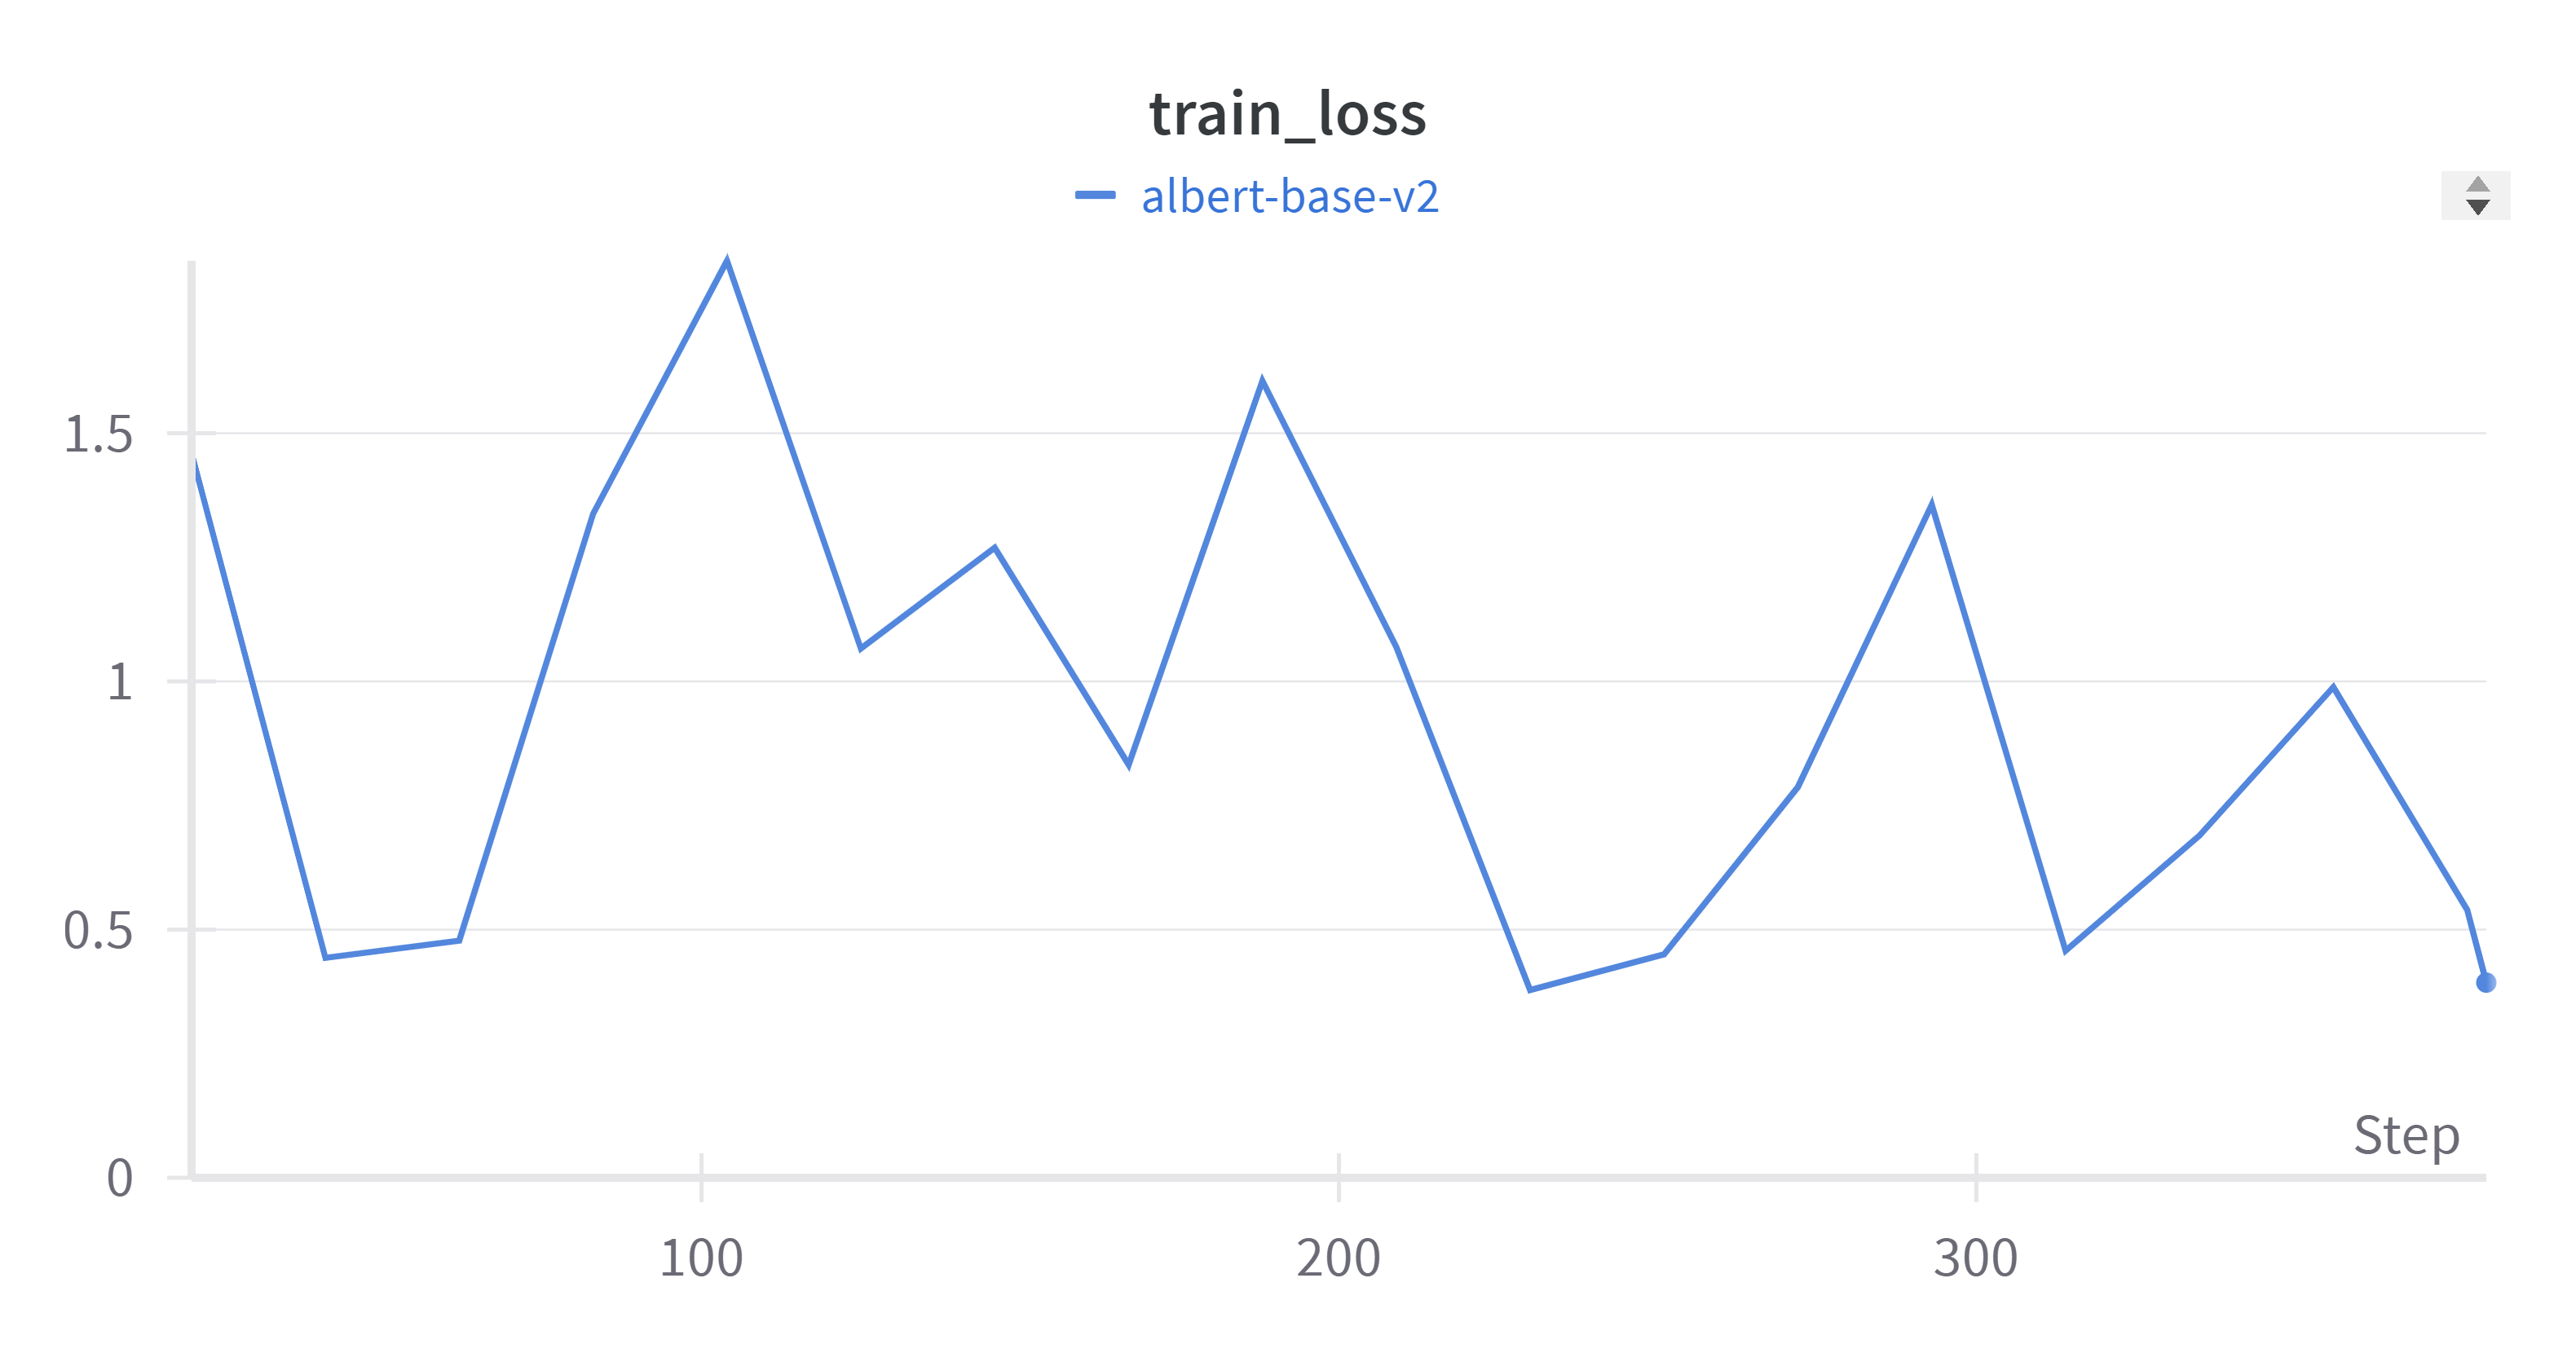

In [21]:
# Path to your PNG file
file_path = 'train-loss-albert-v2.png'

# Display the PNG file
Image(file_path)


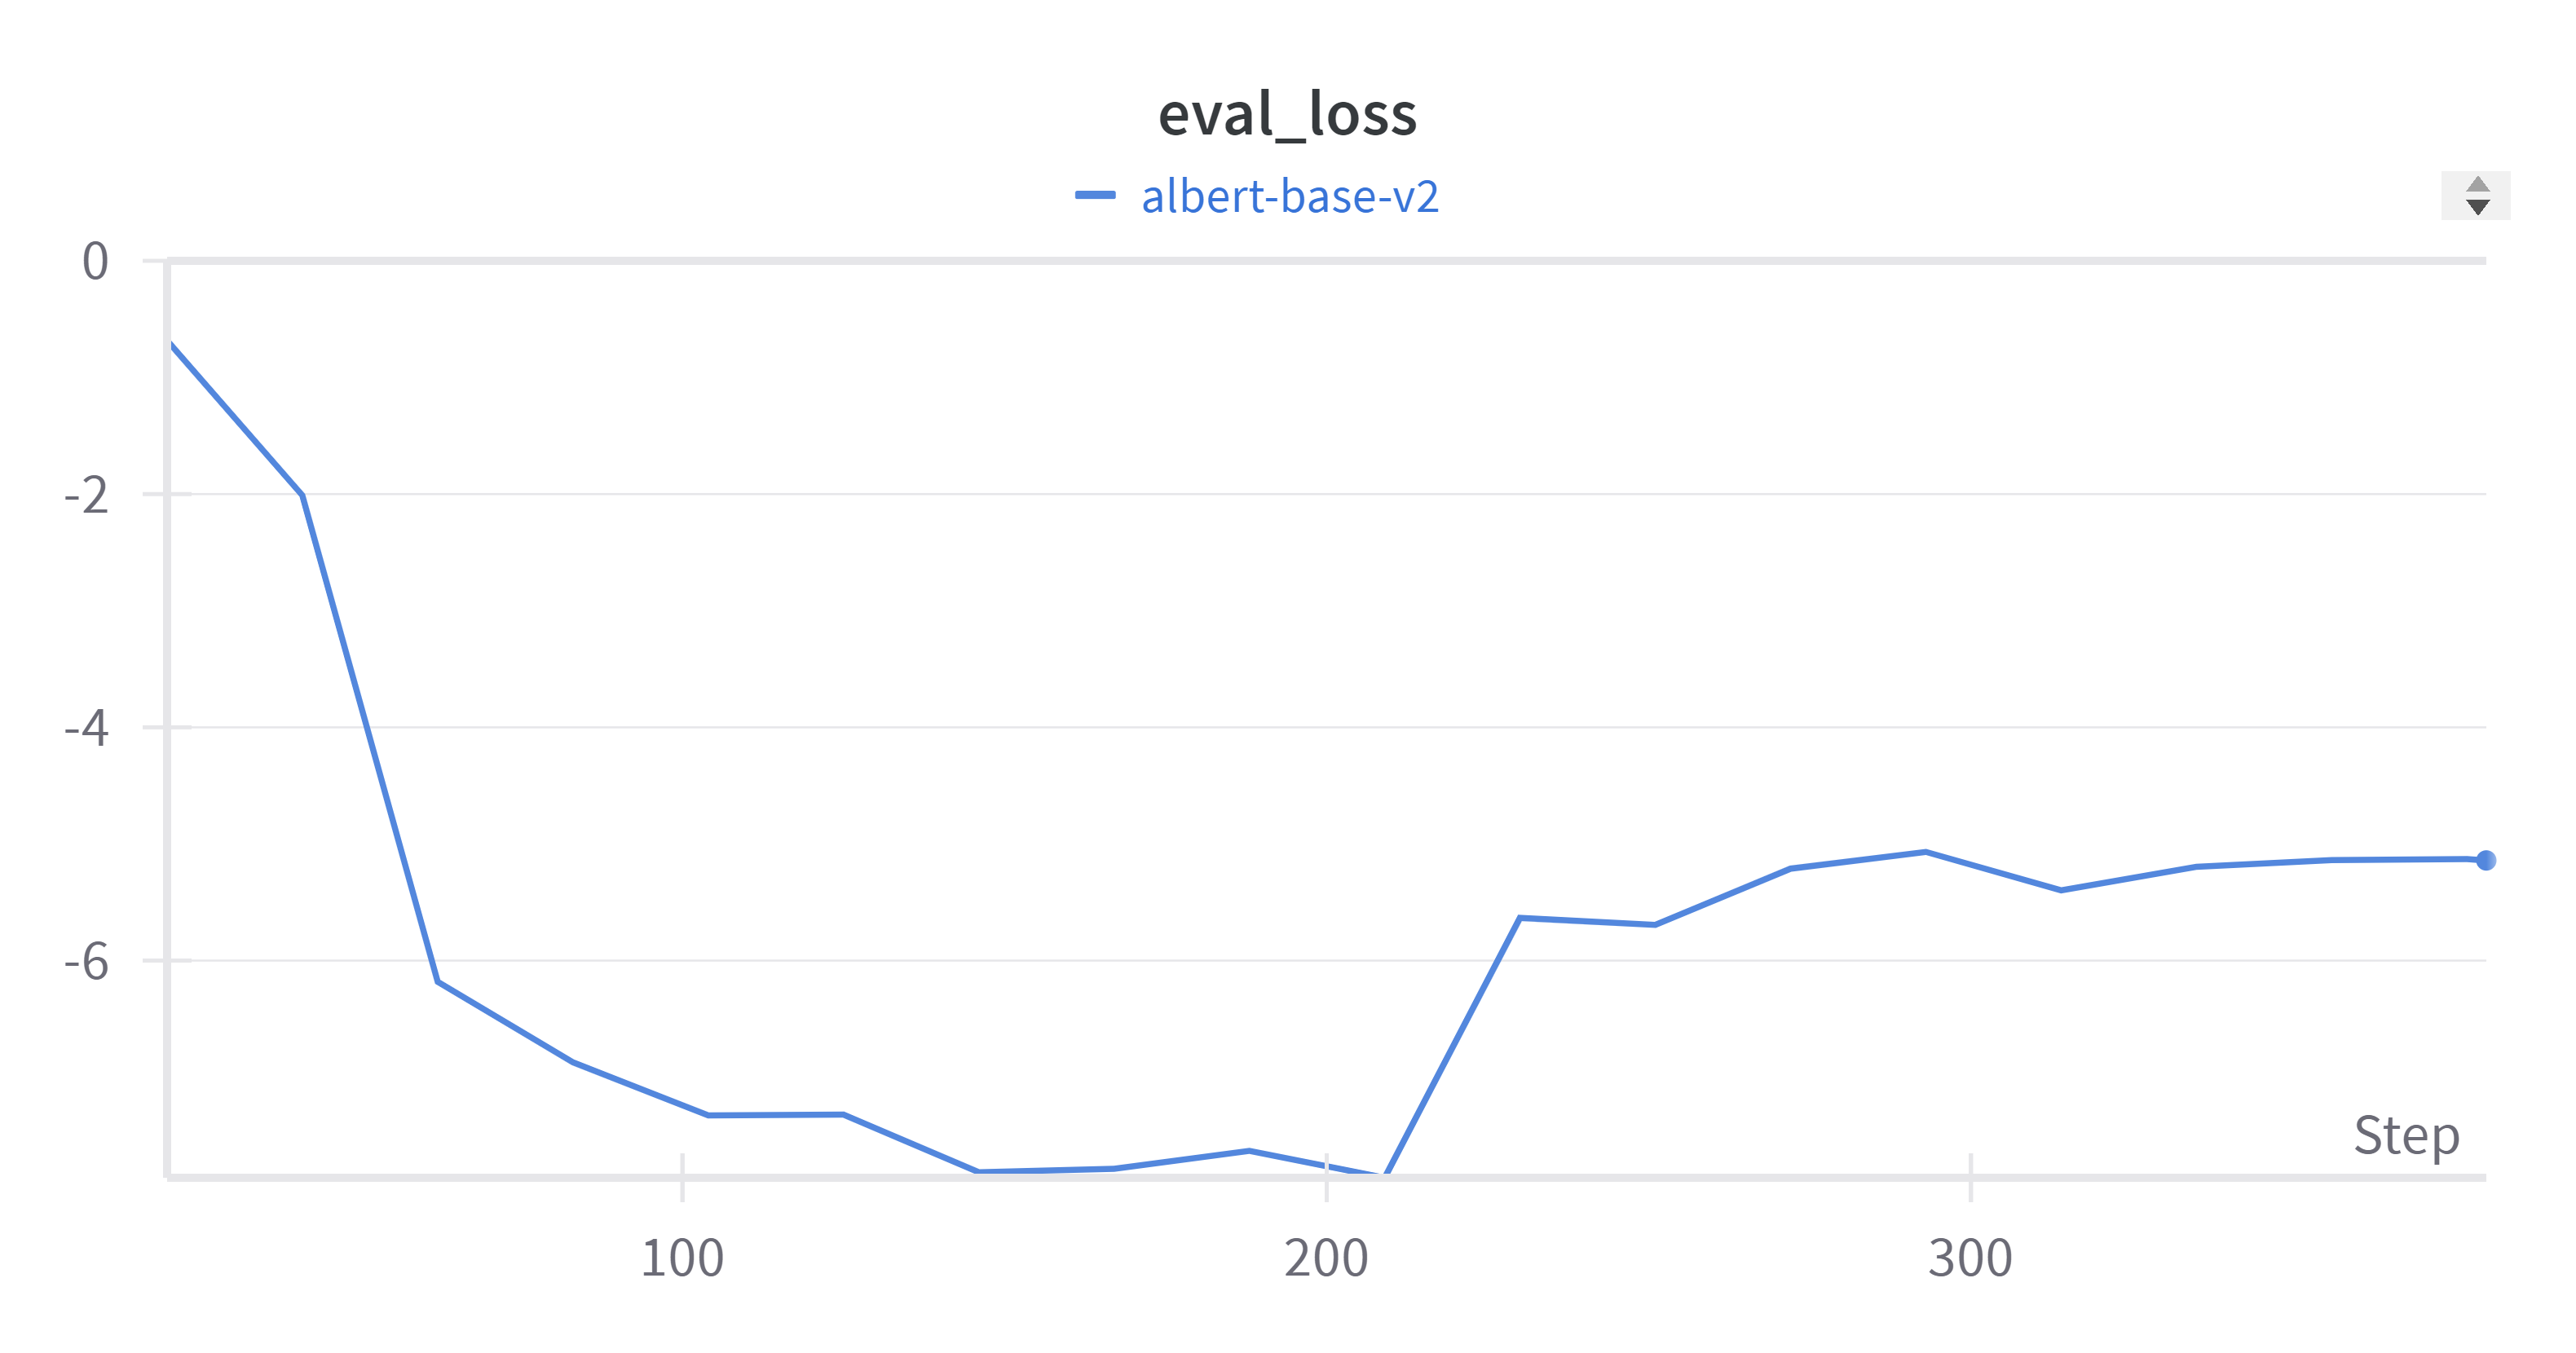

In [17]:
# Path to your PNG file
file_path = 'eval-loss-albert-v2.png'

# Display the PNG file
Image(file_path)


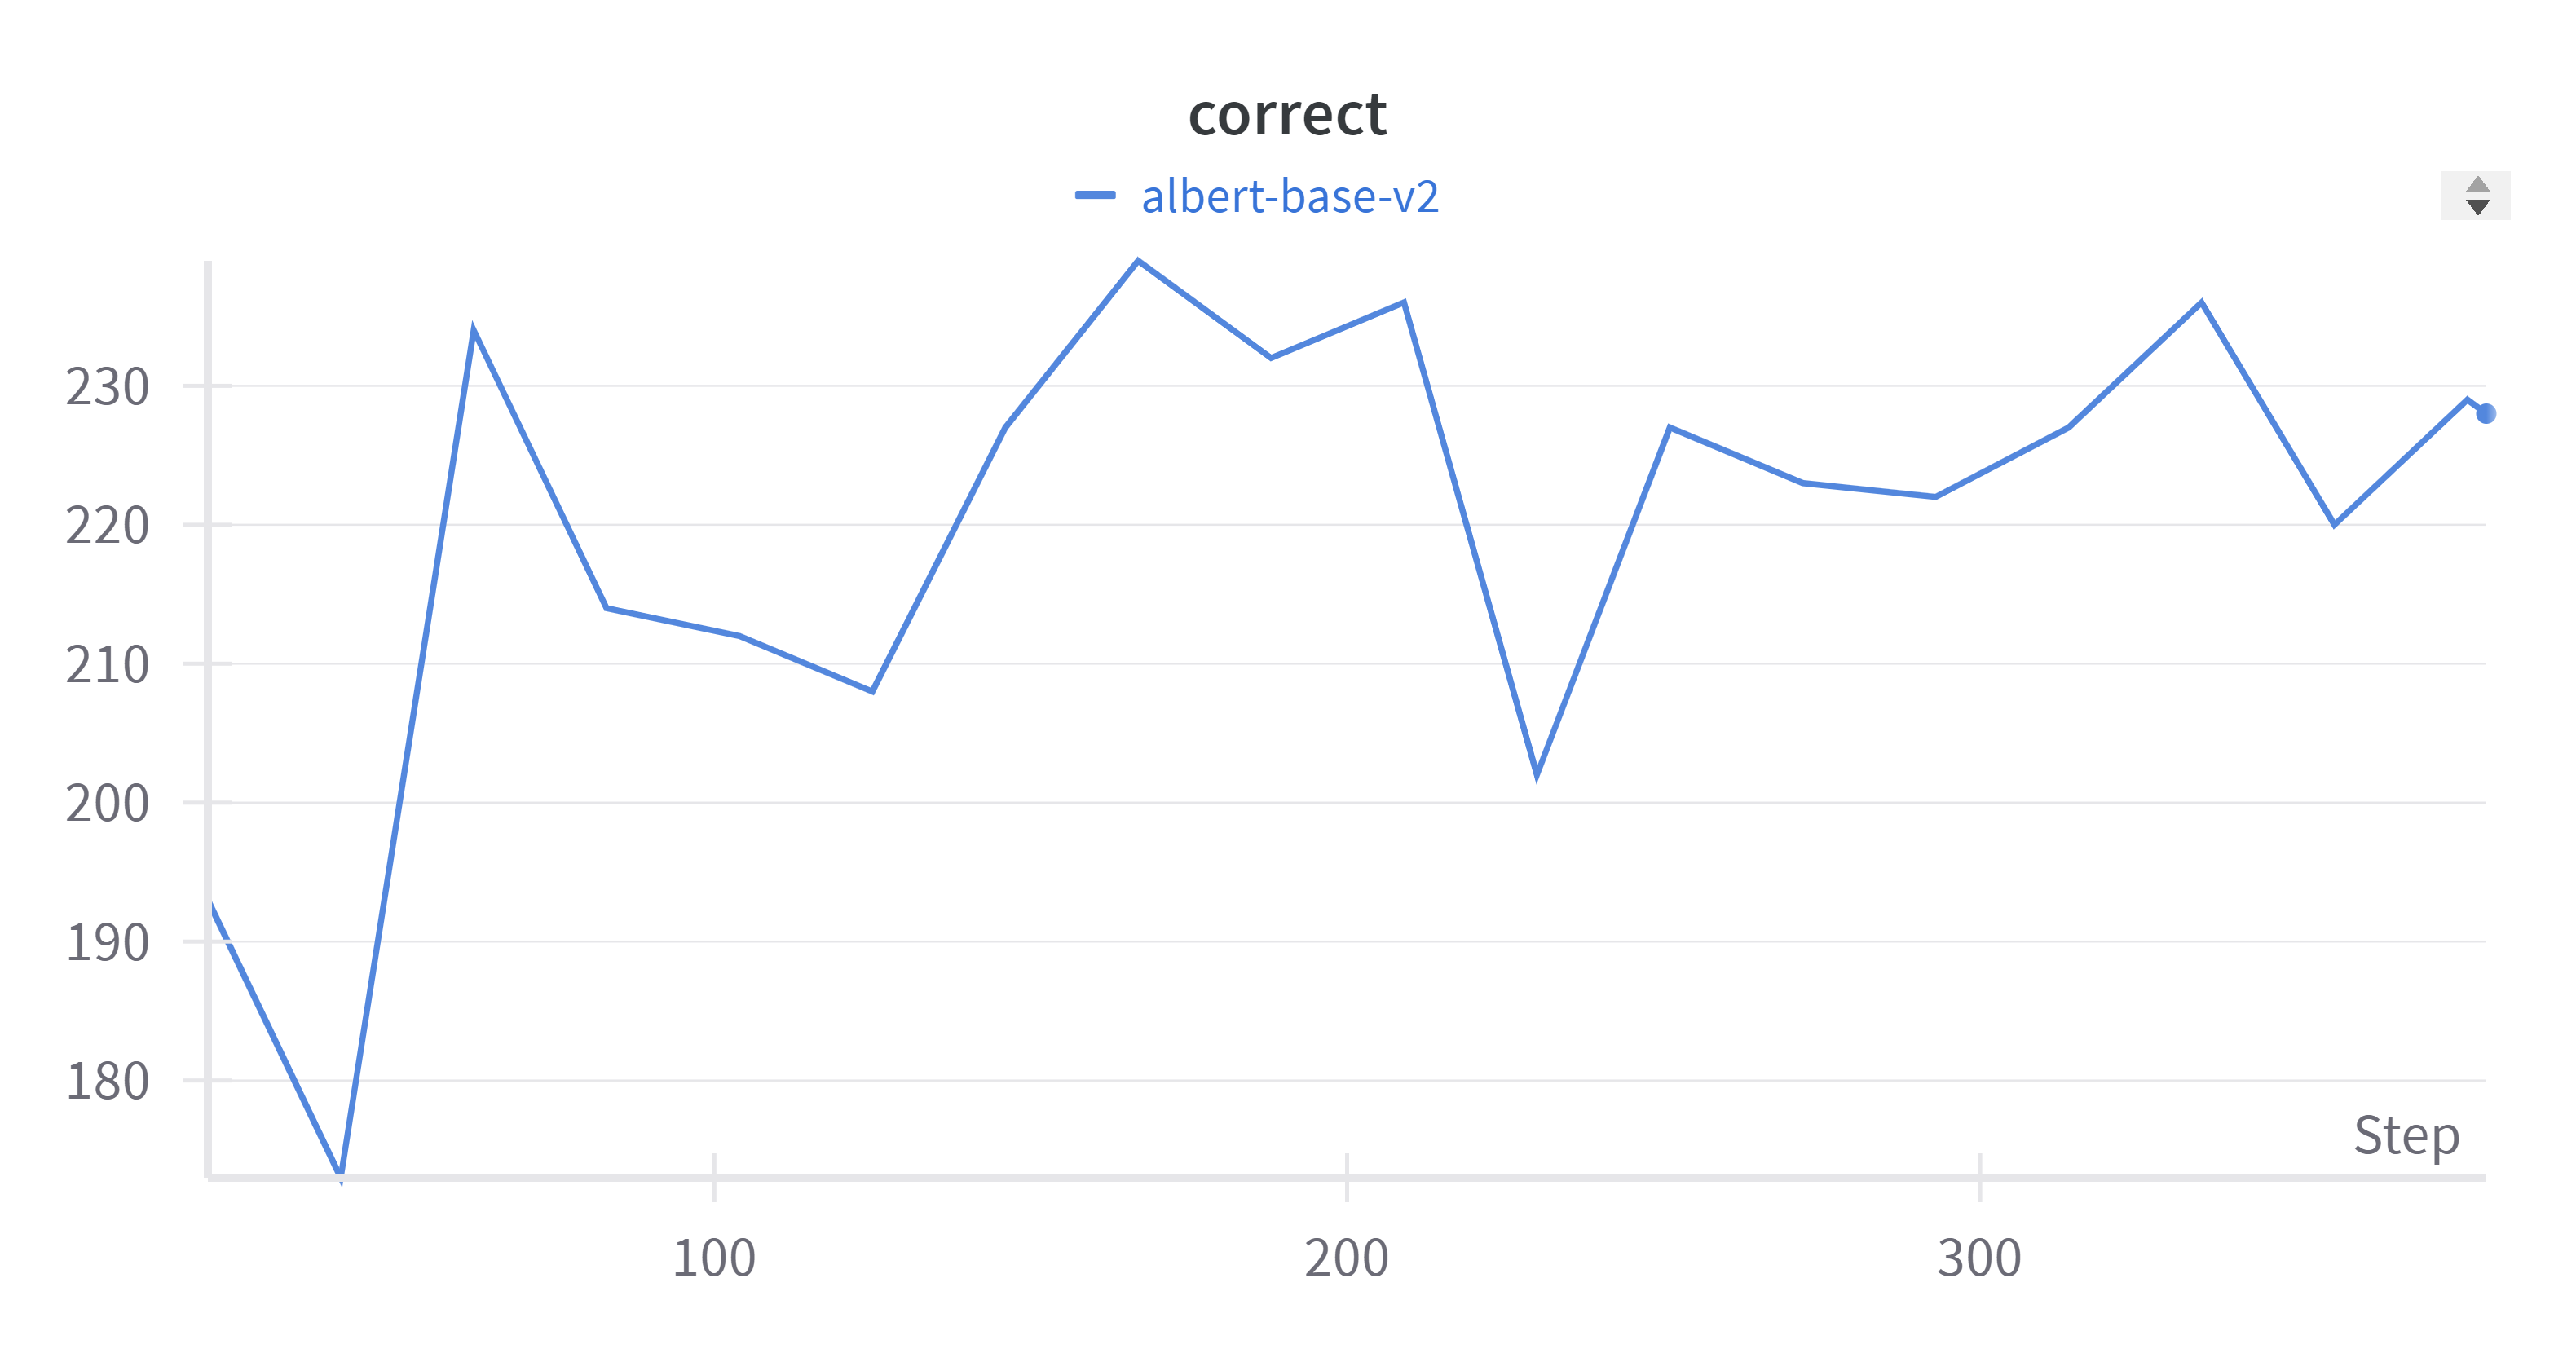

In [18]:
# Path to your PNG file
file_path = 'correct-albert-v2.png'

# Display the PNG file
Image(file_path)


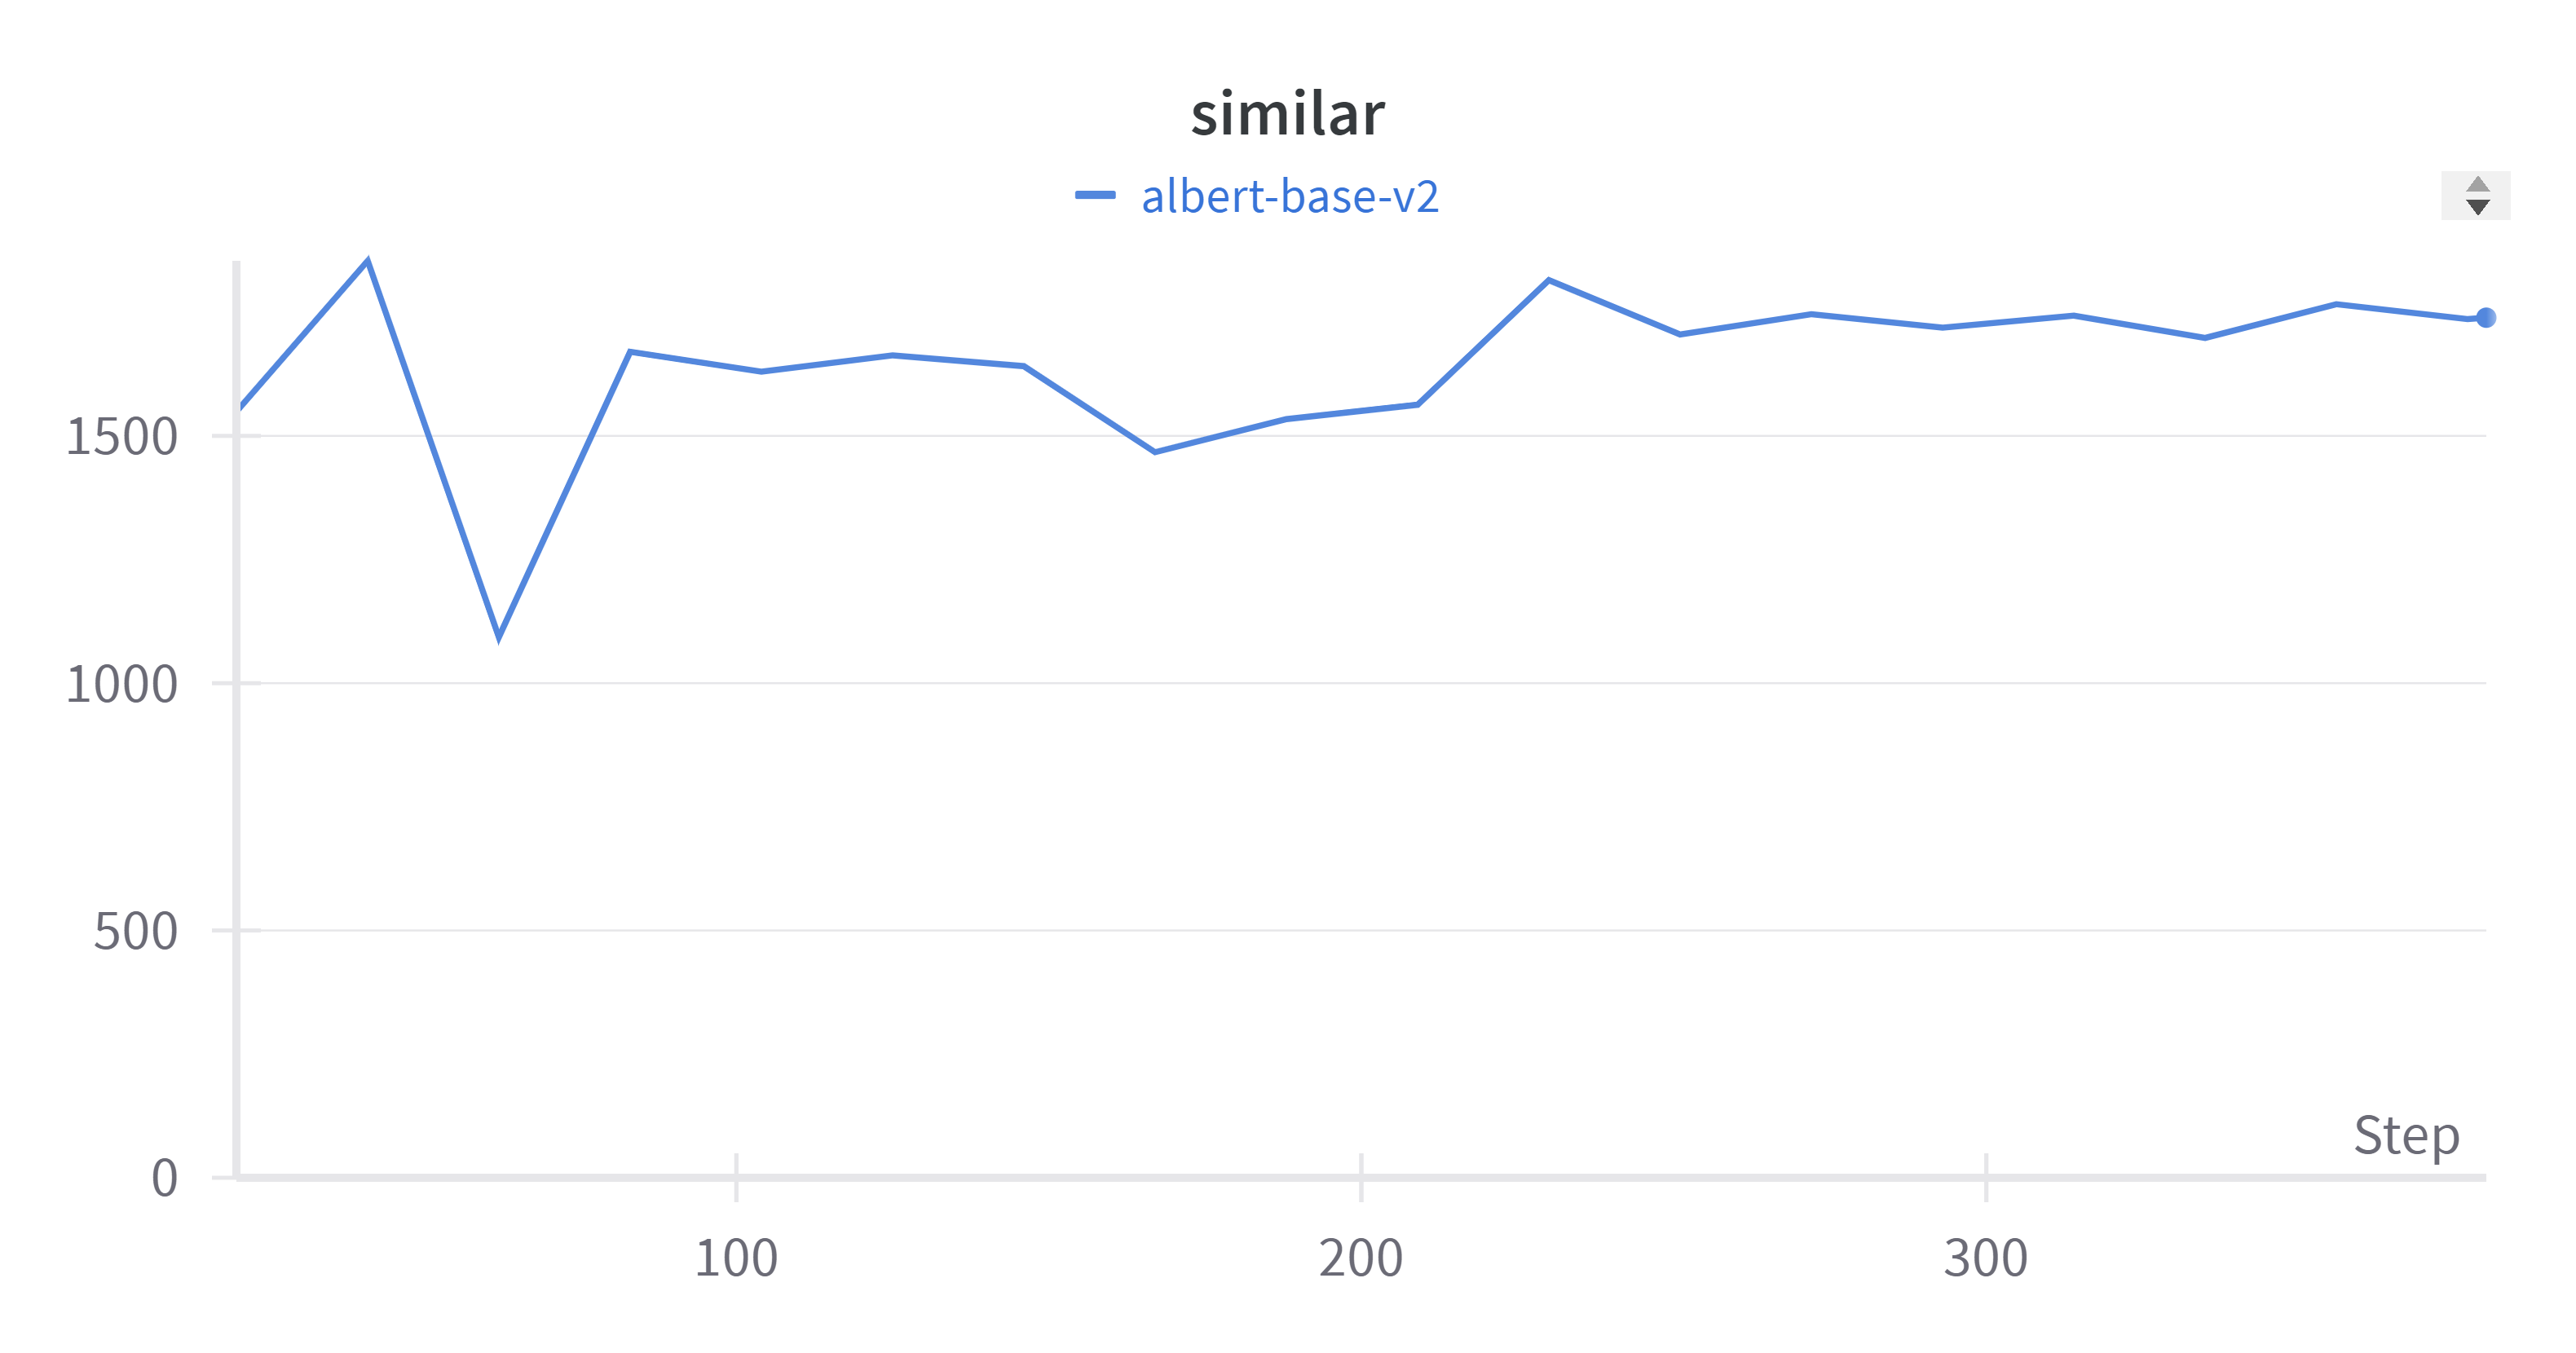

In [19]:
# Path to your PNG file
file_path = 'similar-albert-v2.png'

# Display the PNG file
Image(file_path)


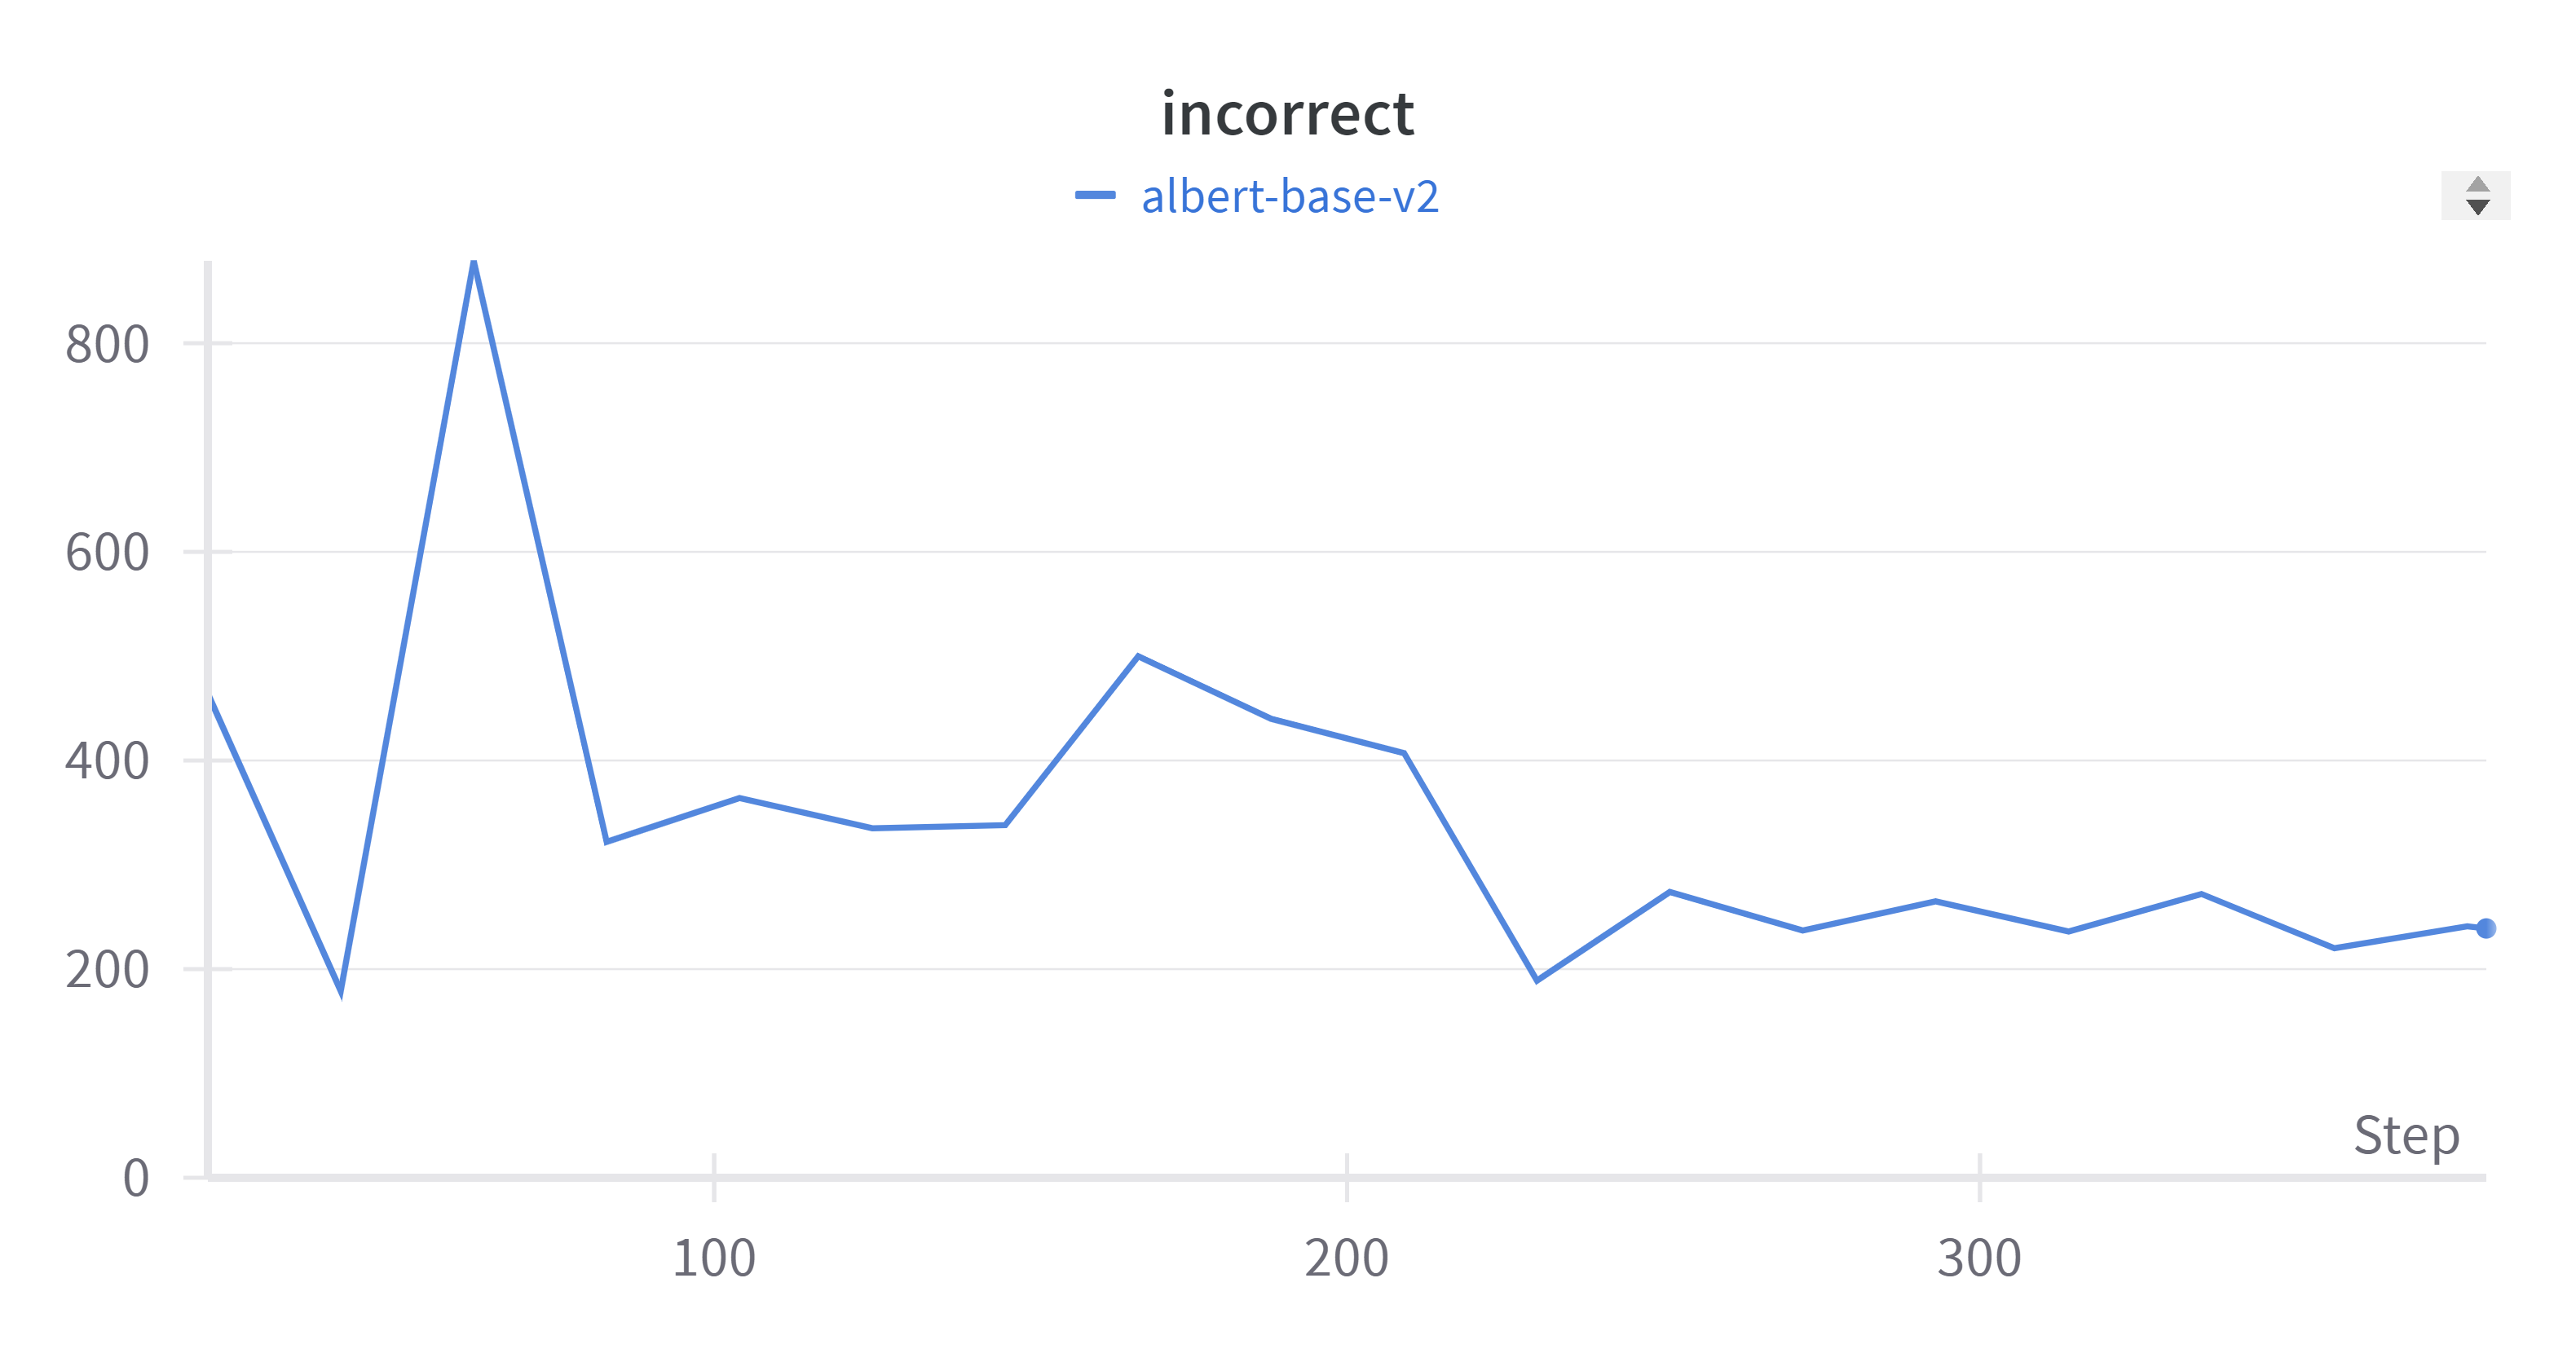

In [20]:
# Path to your PNG file
file_path = 'incorrect-albert-v2.png'

# Display the PNG file
Image(file_path)


In [14]:
context_text = "chronic urethral obstruction because of urinary calculi, prostatic hyperophy, tumors, normal pregnancy, tumors, uterine prolapse or functional disorders cause hydronephrosis which by definition is used to describe dilatation of renal pelvis and calculus associated with progressive atrophy of the kidney due to obstruction to the outflow of urine refer robbins 7yh/9,1012,9/e. p950"

In [15]:
predictions, raw_outputs = model.predict(
    [
        {
            "context": context_text,
            "qas": [
                {
                    "question": "Chronic urethral obstruction due to benign prismatic hyperplasia can lead to the following change in kidney parenchyma",
                    "id": "0",
                }
            ],
        }
    ]
)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
add example index and unique id: 100%|██████████| 1/1 [00:00<00:00, 8886.24it/s]


Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
predictions

[{'id': '0',
  'answer': ['',
   'hydronephrosis',
   'hydronephrosis which by definition is used to describe dilatation of renal pelvis and calculus associated with progressive atrophy',
   'hydronephrosis which by definition is used to describe dilatation of renal pelvis',
   'progressive atrophy',
   'hydronephrosis which by definition is used to describe dilatation',
   'dilatation of renal pelvis and calculus associated with progressive atrophy',
   'atrophy',
   'hydronephrosis which by definition is used to describe dilatation of renal pelvis and calculus associated with progressive atrophy of the kidney due to obstruction to the outflow of urine',
   'dilatation of renal pelvis',
   'uterine prolapse or functional disorders cause hydronephrosis',
   'hydronephrosis which by definition is used to describe dilatation of renal pelvis and calculus',
   'urinary calculi, prostatic hyperophy, tumors, normal pregnancy, tumors, uterine prolapse or functional disorders cause hydronephro

In [17]:
options = ["Hyperplasia","Hyperophy","Atrophy","Dyplasia"]

In [18]:
option_counts = {option: 0 for option in options}

# Iterate over each prediction
for prediction in predictions:
    # Iterate over each answer in the prediction
    for answer in prediction['answer']:
        # Iterate over each option
        for option in options:
            # Check if the option is present in the answer (case-insensitive)
            if option.lower() in answer.lower():
                # Increment the count for the option
                option_counts[option] += 1

# Find the option with the highest count
selected_option = max(option_counts, key=option_counts.get)

print("Selected Option:", selected_option)

Selected Option: Atrophy


In [19]:
model.model

AlbertForQuestionAnswering(
  (albert): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias

In [ ]:
model = QuestionAnsweringModel(
    "albert", "outputs/", use_cuda=False
)

In [5]:
model.model

AlbertForQuestionAnswering(
  (albert): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias

In [6]:
import json
with open('test-new.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [11]:

i=100
j=i
accuracy_count=0
for entry in test_data[0:100]:
    context_text = entry["exp"].lower()
    question_text = entry["question"]
    qas = []
    indic = {"question":question_text,"id":i}
    qas.append(indic)
    predictions, raw_outputs = model.predict(
        [
            {
                "context":context_text,
                "qas":qas,
            }
        ]
    )
    options = [entry["opa"],entry["opb"],entry["opc"],entry["opd"]]
    option_counts = {option: 0 for option in options}
    correct_answer = ""
    if(entry["cop"]==1):
        correct_answer = entry["opa"]
    if(entry["cop"]==2):
        correct_answer = entry["opb"]
    if(entry["cop"]==3):
        correct_answer = entry["opc"]
    if(entry["cop"]==4):
        correct_answer = entry["opd"]
    # Iterate over each prediction
    for prediction in predictions:
        # Iterate over each answer in the prediction
        for answer in prediction['answer']:
            # Iterate over each option
            for option in options:
                # Check if the option is present in the answer (case-insensitive)
                if option.lower() in answer.lower():
                    # Increment the count for the option
                    option_counts[option] += 1

    # Find the option with the highest count
    selected_option = max(option_counts, key=option_counts.get)
    print("question no -> ",101-i)
    if(selected_option==correct_answer):
        accuracy_count=accuracy_count+1
        print("Correct Answer")
        print("Predicted Answer -> ",selected_option,end=" ")
        print("Correct Answer -> ", correct_answer)
    else:
        print("Wrong Answer")
        print("Predicted Answer -> ",selected_option,end=" ")
        print("Correct Answer -> ", correct_answer)
    i=i-1
    if(i==0):
        break
print((accuracy_count/j)*100)

Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


question no ->  1
Correct Answer
Predicted Answer ->  Conservative management Correct Answer ->  Conservative management


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]


question no ->  2
Correct Answer
Predicted Answer ->  Protamine sulfate Correct Answer ->  Protamine sulfate


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.02it/s]


question no ->  3
Correct Answer
Predicted Answer ->  Soy based diet Correct Answer ->  Soy based diet


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.05it/s]


question no ->  4
Wrong Answer
Predicted Answer ->  Ritodrine Correct Answer ->  Nifidipine


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.00it/s]


question no ->  5
Correct Answer
Predicted Answer ->  Canal wall down mastoidectomy Correct Answer ->  Canal wall down mastoidectomy


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.34it/s]


question no ->  6
Correct Answer
Predicted Answer ->  Amnestic syndrome Correct Answer ->  Amnestic syndrome


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.86it/s]


question no ->  7
Correct Answer
Predicted Answer ->  Pramlinitide Correct Answer ->  Pramlinitide


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.46it/s]


question no ->  8
Correct Answer
Predicted Answer ->  Pumps sodium out of cell Correct Answer ->  Pumps sodium out of cell


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.30it/s]


question no ->  9
Wrong Answer
Predicted Answer ->  Bladder volume of 400 mL Correct Answer ->  Phase Ib of cystometrogram


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.33it/s]


question no ->  10
Wrong Answer
Predicted Answer ->  WT1 Correct Answer ->  RAS


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.86it/s]


question no ->  11
Correct Answer
Predicted Answer ->  Coho studies Correct Answer ->  Coho studies


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.97it/s]


question no ->  12
Wrong Answer
Predicted Answer ->  Pre malignant Correct Answer ->  Pre cricoid webs


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


question no ->  13
Correct Answer
Predicted Answer ->  Competitive inhibition Correct Answer ->  Competitive inhibition


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.25s/it]


question no ->  14
Correct Answer
Predicted Answer ->  Mass density Correct Answer ->  Mass density


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.17it/s]


question no ->  15
Correct Answer
Predicted Answer ->  Whole body Correct Answer ->  Whole body


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.54it/s]


question no ->  16
Wrong Answer
Predicted Answer ->  Increased Bile and cholesterol ratio Correct Answer ->  Decreased Bile and cholesterol ratio


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.33it/s]


question no ->  17
Correct Answer
Predicted Answer ->  Breaking one chemical bond Correct Answer ->  Breaking one chemical bond


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.31it/s]


question no ->  18
Correct Answer
Predicted Answer ->  Acetazolamide Correct Answer ->  Acetazolamide


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


question no ->  19
Correct Answer
Predicted Answer ->  Dentition Correct Answer ->  Dentition


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.46it/s]


question no ->  20
Correct Answer
Predicted Answer ->  Cimetidine Correct Answer ->  Cimetidine


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.20it/s]


question no ->  21
Correct Answer
Predicted Answer ->  D. Medinensis Correct Answer ->  D. Medinensis


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.17it/s]


question no ->  22
Wrong Answer
Predicted Answer ->  Bitemporal hemianopia Correct Answer ->  Homonymous hemianopia with macular sparing


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.43it/s]


question no ->  23
Correct Answer
Predicted Answer ->  Airway - Breathing - Compression (A-B-C) Correct Answer ->  Airway - Breathing - Compression (A-B-C)


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


question no ->  24
Correct Answer
Predicted Answer ->  Dopamine Correct Answer ->  Dopamine


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.92it/s]


question no ->  25
Correct Answer
Predicted Answer ->  Covering Correct Answer ->  Covering


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.32it/s]


question no ->  26
Correct Answer
Predicted Answer ->  NADPH oxidase Correct Answer ->  NADPH oxidase


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.43it/s]


question no ->  27
Wrong Answer
Predicted Answer ->  Stochastic effect Correct Answer ->  Non-Stochastic effect


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.53it/s]


question no ->  28
Correct Answer
Predicted Answer ->  Tilt the head on opposite side Correct Answer ->  Tilt the head on opposite side


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


question no ->  29
Correct Answer
Predicted Answer ->  Alkylating agents Correct Answer ->  Alkylating agents


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.35it/s]


question no ->  30
Correct Answer
Predicted Answer ->  Phototoxicity Correct Answer ->  Phototoxicity


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


question no ->  31
Wrong Answer
Predicted Answer ->  Arch of aoa Correct Answer ->  SVC


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.48it/s]


question no ->  32
Correct Answer
Predicted Answer ->  Paracetamol Correct Answer ->  Paracetamol


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.35it/s]


question no ->  33
Wrong Answer
Predicted Answer ->  Severe falciparum malaria Correct Answer ->  Abruption placentae


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.46it/s]


question no ->  34
Wrong Answer
Predicted Answer ->  Increase fertility Correct Answer ->  Decrease fertility


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.98it/s]


question no ->  35
Correct Answer
Predicted Answer ->  P. falciparum Correct Answer ->  P. falciparum


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


question no ->  36
Correct Answer
Predicted Answer ->  Simple bone cyst Correct Answer ->  Simple bone cyst


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.08it/s]


question no ->  37
Correct Answer
Predicted Answer ->  Tissue toxicity plays an impoant role in clinical CO poisoning Correct Answer ->  Tissue toxicity plays an impoant role in clinical CO poisoning


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.89it/s]


question no ->  38
Correct Answer
Predicted Answer ->  CD-52 Correct Answer ->  CD-52


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.24it/s]


question no ->  39
Correct Answer
Predicted Answer ->  Na+ K+ ATPase Correct Answer ->  Na+ K+ ATPase


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.43it/s]


question no ->  40
Correct Answer
Predicted Answer ->  20 mg elemental iron and 100 microgram folic acid Correct Answer ->  20 mg elemental iron and 100 microgram folic acid


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.30it/s]


question no ->  41
Wrong Answer
Predicted Answer ->  CT scan Correct Answer ->  Sestamibi scintigraphy


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.27it/s]


question no ->  42
Correct Answer
Predicted Answer ->  Neck flexion Correct Answer ->  Neck flexion


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.24it/s]


question no ->  43
Correct Answer
Predicted Answer ->  Ankyloblepharon Correct Answer ->  Ankyloblepharon


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.55it/s]


question no ->  44
Correct Answer
Predicted Answer ->  Decreased Serum Calcium, phosphorus and alkaline phosphatase is seen Correct Answer ->  Decreased Serum Calcium, phosphorus and alkaline phosphatase is seen


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.79it/s]


question no ->  45
Correct Answer
Predicted Answer ->  Atypical ductal hyperplasia Correct Answer ->  Atypical ductal hyperplasia


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


question no ->  46
Correct Answer
Predicted Answer ->  Gingival bevel Correct Answer ->  Gingival bevel


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]


question no ->  47
Correct Answer
Predicted Answer ->  Sclerotic bodies Correct Answer ->  Sclerotic bodies


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.09it/s]


question no ->  48
Wrong Answer
Predicted Answer ->  Clostridium perfringens Correct Answer ->  All of the above


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.34it/s]


question no ->  49
Correct Answer
Predicted Answer ->  Prematurity Correct Answer ->  Prematurity


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


question no ->  50
Wrong Answer
Predicted Answer ->  I Correct Answer ->  IV


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.94it/s]


question no ->  51
Wrong Answer
Predicted Answer ->  3 Correct Answer ->  7


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.35it/s]


question no ->  52
Correct Answer
Predicted Answer ->  0.6 Correct Answer ->  0.6


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.17it/s]


question no ->  53
Correct Answer
Predicted Answer ->  Tellurite medium Correct Answer ->  Tellurite medium


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.48it/s]


question no ->  54
Correct Answer
Predicted Answer ->  A-Scan biometry Correct Answer ->  A-Scan biometry


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


question no ->  55
Wrong Answer
Predicted Answer ->  Burns involving genitalia Correct Answer ->  Burns injury not complicated by pre - existing disease


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.03it/s]


question no ->  56
Correct Answer
Predicted Answer ->  Endotracheal tube obstruction Correct Answer ->  Endotracheal tube obstruction


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


question no ->  57
Correct Answer
Predicted Answer ->  Aldesleukin Correct Answer ->  Aldesleukin


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.81it/s]


question no ->  58
Correct Answer
Predicted Answer ->  Stenger's test Correct Answer ->  Stenger's test


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.12it/s]


question no ->  59
Correct Answer
Predicted Answer ->  Musculocutaneous nerve Correct Answer ->  Musculocutaneous nerve


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.54it/s]


question no ->  60
Correct Answer
Predicted Answer ->  Glassgow coma scale Correct Answer ->  Glassgow coma scale


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.40it/s]


question no ->  61
Correct Answer
Predicted Answer ->  Proteus Correct Answer ->  Proteus


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.39it/s]


question no ->  62
Correct Answer
Predicted Answer ->  Type I Correct Answer ->  Type I


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.18it/s]


question no ->  63
Wrong Answer
Predicted Answer ->  Pontine damage Correct Answer ->  Diffuse coical damage


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


question no ->  64
Wrong Answer
Predicted Answer ->  Vitamin B6 Correct Answer ->  Vitamin B3


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.26it/s]


question no ->  65
Correct Answer
Predicted Answer ->  Conjunctival xerosis Correct Answer ->  Conjunctival xerosis


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.39it/s]


question no ->  66
Correct Answer
Predicted Answer ->  HBeAg Correct Answer ->  HBeAg


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.59it/s]


question no ->  67
Wrong Answer
Predicted Answer ->  Intravenous ceftriaxone Correct Answer ->  Intravenous metronidazole


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.83it/s]


question no ->  68
Wrong Answer
Predicted Answer ->  Usually has autosomal dominant inheritance Correct Answer ->  Aplastic crises are common


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


question no ->  69
Correct Answer
Predicted Answer ->  Toluene Correct Answer ->  Toluene


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.08it/s]


question no ->  70
Correct Answer
Predicted Answer ->  Lichen planus Correct Answer ->  Lichen planus


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.48it/s]


question no ->  71
Correct Answer
Predicted Answer ->  >Bone morphogenetic protein receptor II Correct Answer ->  >Bone morphogenetic protein receptor II


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.36it/s]


question no ->  72
Correct Answer
Predicted Answer ->  Necrosis of airways Correct Answer ->  Necrosis of airways


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]


question no ->  73
Wrong Answer
Predicted Answer ->  Mapelson A circuit Correct Answer ->  Mapelson E circuit


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.48it/s]


question no ->  74
Wrong Answer
Predicted Answer ->  Claude Bernard Correct Answer ->  Ambroise Pare


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.75it/s]


question no ->  75
Wrong Answer
Predicted Answer ->  Propranolol Correct Answer ->  Ethosuximide


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.63it/s]


question no ->  76
Wrong Answer
Predicted Answer ->  Demyelinating polyneuropathy Correct Answer ->  Descending paralysis


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.36it/s]


question no ->  77
Correct Answer
Predicted Answer ->  Detection of characteristic DNA polymorphism in a family associated with disorders Correct Answer ->  Detection of characteristic DNA polymorphism in a family associated with disorders


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.28it/s]


question no ->  78
Correct Answer
Predicted Answer ->  Vein, Artery, Nerve Correct Answer ->  Vein, Artery, Nerve


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.61it/s]


question no ->  79
Wrong Answer
Predicted Answer ->  Obesity Correct Answer ->  Smoking


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.05it/s]


question no ->  80
Correct Answer
Predicted Answer ->  Influenza Correct Answer ->  Influenza


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


question no ->  81
Correct Answer
Predicted Answer ->  50 300 Correct Answer ->  50 300


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.40it/s]


question no ->  82
Correct Answer
Predicted Answer ->  Antihistaminic Correct Answer ->  Antihistaminic


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.40it/s]


question no ->  83
Correct Answer
Predicted Answer ->  Orbital mucomycosis Correct Answer ->  Orbital mucomycosis


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]


question no ->  84
Correct Answer
Predicted Answer ->  Oxytocin Correct Answer ->  Oxytocin


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]


question no ->  85
Correct Answer
Predicted Answer ->  Tumors of the CNS Correct Answer ->  Tumors of the CNS


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


question no ->  86
Correct Answer
Predicted Answer ->  Herpes Zoster Correct Answer ->  Herpes Zoster


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.10it/s]


question no ->  87
Correct Answer
Predicted Answer ->  Membrane damage Correct Answer ->  Membrane damage


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.36it/s]


question no ->  88
Correct Answer
Predicted Answer ->  Staphylococcus aureus Correct Answer ->  Staphylococcus aureus


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.24it/s]


question no ->  89
Correct Answer
Predicted Answer ->  >Acute promyelocytic leukemia Correct Answer ->  >Acute promyelocytic leukemia


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.36it/s]


question no ->  90
Wrong Answer
Predicted Answer ->  Cannabis Correct Answer ->  Datura


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.39it/s]


question no ->  91
Correct Answer
Predicted Answer ->  S.lipase Correct Answer ->  S.lipase


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.33it/s]


question no ->  92
Wrong Answer
Predicted Answer ->  Surgery and radiotherapy Correct Answer ->  Surgery only


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.33it/s]


question no ->  93
Wrong Answer
Predicted Answer ->  acd Correct Answer ->  ade


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.33it/s]


question no ->  94
Correct Answer
Predicted Answer ->  Pulp space infection Correct Answer ->  Pulp space infection


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.41it/s]


question no ->  95
Wrong Answer
Predicted Answer ->  Occurs in immunodeficient states Correct Answer ->  Anticapsular antibody is protective


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


question no ->  96
Correct Answer
Predicted Answer ->  Posterior dislocation of hip Correct Answer ->  Posterior dislocation of hip


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.96it/s]


question no ->  97
Correct Answer
Predicted Answer ->  Filaria Correct Answer ->  Filaria


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


question no ->  98
Correct Answer
Predicted Answer ->  Medial epicondylitis Correct Answer ->  Medial epicondylitis


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.38it/s]


question no ->  99
Wrong Answer
Predicted Answer ->  Missed aboion Correct Answer ->  Ectopic gestation


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.08it/s]

question no ->  100
Wrong Answer
Predicted Answer ->  Hypokalemia Correct Answer ->  Hyperkalemia
70.0


In [6]:
tokenizer = model.tokenizer

In [7]:
tokenizer

AlbertTokenizer(name_or_path='outputs/', vocab_size=30000, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '<unk>', 'sep_token': '[SEP]', 'pad_token': '<pad>', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [10]:
model = QuestionAnsweringModel(
    "albert", "outputs/", use_cuda=False
)

In [5]:
import json
with open("test-new.json", "r") as f:
    test_data = json.load(f)

In [9]:
from sklearn.metrics import f1_score
i=100
def f1_score(pred_answer, true_answer, tokenizer):
    # Tokenize predicted and true answers
    pred_tokens = set(tokenizer.tokenize(pred_answer.lower()))
    true_tokens = set(tokenizer.tokenize(true_answer.lower()))

    # Calculate precision
    if len(pred_tokens) == 0 or len(true_tokens) == 0:
        return 0
    else:
        precision = len(pred_tokens.intersection(true_tokens)) / len(pred_tokens)

    # Calculate recall
    recall = len(pred_tokens.intersection(true_tokens)) / len(true_tokens)

    # Calculate F1 score
    if precision + recall == 0:
        return 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)

    return f1

predicted_answers = []
true_answers = []
tokenizer = model.tokenizer
f1_scores = []

for entry in test_data[0:100]:
    context_text = entry["exp"].lower()
    question_text = entry["question"]
    qas = []
    indic = {"question": question_text, "id": 101-i}
    qas.append(indic)
    predictions, raw_outputs = model.predict(
        [
            {
                "context": context_text,
                "qas": qas,
            }
        ]
    )
    options = [entry["opa"], entry["opb"], entry["opc"], entry["opd"]]
    option_counts = {option: 0 for option in options}
    correct_answer = ""
    if entry["cop"] == 1:
        correct_answer = entry["opa"]
    if entry["cop"] == 2:
        correct_answer = entry["opb"]
    if entry["cop"] == 3:
        correct_answer = entry["opc"]
    if entry["cop"] == 4:
        correct_answer = entry["opd"]
    # Iterate over each prediction
    for prediction in predictions:
        # Iterate over each answer in the prediction
        for answer in prediction["answer"]:
            for option in options:
                # Check if the option is present in the answer (case-insensitive)
                if option.lower() in answer.lower():
                    # Increment the count for the option
                    option_counts[option] += 1
    selected_option = max(option_counts, key=option_counts.get)
    print("Question:", question_text)
    print("Predicted Answer:", selected_option)
    print("True Answer:", correct_answer)
    print("F1 Score:", f1_score(selected_option, correct_answer, tokenizer))
    f1_scores.append(f1_score(selected_option, correct_answer, tokenizer))
    print("="*50)

    i -= 1
    if i == 0:
        break

# Calculate overall F1 score
overall_f1 = sum(f1_scores) / len(f1_scores)
print("Overall F1 Score:", overall_f1)

Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.41it/s]


Question: A 27 year old patient presented with left sided abdominal pain to the emergency room; 6 hours FAST positive. Contrast Enhanced CT (CECT) scan showed grade III splenic laceration.What will be the most appropriate treatment
Predicted Answer: Conservative management
True Answer: Conservative management
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.70it/s]


Question: The drug used in heparin overdose is:
Predicted Answer: Protamine sulfate
True Answer: Protamine sulfate
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.05it/s]


Question: A child was found to have allergy to cow milk which of the following is used for next management?
Predicted Answer: Soy based diet
True Answer: Soy based diet
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.84it/s]


Question: Drug given to reduce uterine contractions during preterm labour with least side effects :
Predicted Answer: Ritodrine
True Answer: Nifidipine
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.85it/s]


Question: A 30 year old male is having attic cholesteatoma of left ear with lateral sinus thrombophlebitis. Which of the following would be the operation of choice?
Predicted Answer: Canal wall down mastoidectomy
True Answer: Canal wall down mastoidectomy
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.51it/s]


Question: In which of the following chronic conditions, degenerative changes in the brain are seen, which is not a pa of normal ageing?
Predicted Answer: Amnestic syndrome
True Answer: Amnestic syndrome
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.14it/s]


Question: Which antidiabetic drug is used both for type I & II DM-
Predicted Answer: Pramlinitide
True Answer: Pramlinitide
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.31it/s]


Question: All are true statement about digitalis action EXCEPT:
Predicted Answer: Pumps sodium out of cell
True Answer: Pumps sodium out of cell
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.72it/s]


Question: The first urge to void is felt at:
Predicted Answer: Bladder volume of 400 mL
True Answer: Phase Ib of cystometrogram
F1 Score: 0.28571428571428575


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.43it/s]


Question: A 4-year-old child presented to the OPD with a palpable abdominal mass in the right flank region which was painless and slowly increasing in size along with some episodes of fever and hematuria. On examination, hypeension was noted. CT scan of the abdomen was done. The patient was operated and the mass was resected. The gross specimen and the HPE examination are given below. All of the following genes can be mutated in the above disease except: -
Predicted Answer: WT1
True Answer: RAS
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


Question: The natural history of disease is best established by:
Predicted Answer: Coho studies
True Answer: Coho studies
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.22it/s]


Question: Which of the following is false about sideropenic dysphagia?
Predicted Answer: Pre malignant
True Answer: Pre cricoid webs
F1 Score: 0.2


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.29it/s]


Question: Km changes and Vmax remains the same. What is the type of enzyme inhibition?
Predicted Answer: Competitive inhibition
True Answer: Competitive inhibition
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.52it/s]


Question: CT or Hounsfield numbers depend upon:
Predicted Answer: Mass density
True Answer: Mass density
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.89it/s]


Question: How much area is covered by spiral CT in 30 seconds?
Predicted Answer: Whole body
True Answer: Whole body
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.40it/s]


Question: Lithogenic bile has the following propeies
Predicted Answer: Increased Bile and cholesterol ratio
True Answer: Decreased Bile and cholesterol ratio
F1 Score: 0.875


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.75it/s]


Question: beta - Lactamases cause resistance to
penicillins and cephalosporins by
Predicted Answer: Breaking one chemical bond
True Answer: Breaking one chemical bond
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.18it/s]


Question: Non competitive inhibitor of carbonic anhydrase?
Predicted Answer: Acetazolamide
True Answer: Acetazolamide
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.28it/s]


Question: Fluoride helps in -
Predicted Answer: Dentition
True Answer: Dentition
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Question: Which of the following is an enzyme inhibitor -
Predicted Answer: Cimetidine
True Answer: Cimetidine
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.55it/s]


Question: The slender rhabditiform larvae of which of the following helminths move about in water and are ingested by species of cyclops?
Predicted Answer: D. Medinensis
True Answer: D. Medinensis
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.38it/s]


Question: What will be the manifestation of a lesion in occipital lobe?
Predicted Answer: Bitemporal hemianopia
True Answer: Homonymous hemianopia with macular sparing
F1 Score: 0.4210526315789474


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.40it/s]


Question: The 2010 AHA Guidelines for CPR during Basic Life Suppo for neonates Recommends:
Predicted Answer: Airway - Breathing - Compression (A-B-C)
True Answer: Airway - Breathing - Compression (A-B-C)
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.03it/s]


Question: Drug of choice in cardiogenic shock is
Predicted Answer: Dopamine
True Answer: Dopamine
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


Question: Registered medical practitioner protecting unqualified person in practice is known as -
Predicted Answer: Covering
True Answer: Covering
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.42it/s]


Question: A 10-year-old boy with a history of recurrent bacterial infections presents with fever and a productive cough. Biochemical analysis of his neutrophils demonstrates defective oxidative burst. This patient most likely has inherited mutations in the gene that encodes which of the following proteins?
Predicted Answer: NADPH oxidase
True Answer: NADPH oxidase
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]


Question: Effect of radiation above threshold level -
Predicted Answer: Stochastic effect
True Answer: Non-Stochastic effect
F1 Score: 0.25


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.35it/s]


Question: False about sternocleidomastoid-
Predicted Answer: Tilt the head on opposite side
True Answer: Tilt the head on opposite side
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.74it/s]


Question: Which chemotherapeutic agent is pro carcinogenic?
Predicted Answer: Alkylating agents
True Answer: Alkylating agents
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.87it/s]


Question: Paracetamol causes?
Predicted Answer: Phototoxicity
True Answer: Phototoxicity
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.88it/s]


Question: Which of the following is related to mediastinal pa of right lung?
Predicted Answer: Arch of aoa
True Answer: SVC
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.69it/s]


Question: Drug that does not follow nonlinear dose dependent saturation kinetics
Predicted Answer: Paracetamol
True Answer: Paracetamol
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.06it/s]


Question: Conditions associated with incoagulable state are
Predicted Answer: Severe falciparum malaria
True Answer: Abruption placentae
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.22it/s]


Question: Demographic divided is due to -
Predicted Answer: Increase fertility
True Answer: Decrease fertility
F1 Score: 0.5


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.27it/s]


Question: Person having heterozygous sickle cell trait is protected from infection of
Predicted Answer: P. falciparum
True Answer: P. falciparum
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.68it/s]


Question: Fallen fragment sign on X-ray is seen in -
Predicted Answer: Simple bone cyst
True Answer: Simple bone cyst
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]


Question: Which of the following statements about Carbon Monoxide poisoning is not true:
Predicted Answer: Tissue toxicity plays an impoant role in clinical CO poisoning
True Answer: Tissue toxicity plays an impoant role in clinical CO poisoning
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.88it/s]


Question: Alemtuzumab is antibody against
Predicted Answer: CD-52
True Answer: CD-52
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.00it/s]


Question: Digoxin is used for treatment of congestive hea failure. It acts by inhibiting:-
Predicted Answer: Na+ K+ ATPase
True Answer: Na+ K+ ATPase
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.91it/s]


Question: Iron and folic acid requirement of 6 months to 10 year old children is?
Predicted Answer: 20 mg elemental iron and 100 microgram folic acid
True Answer: 20 mg elemental iron and 100 microgram folic acid
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.78it/s]


Question: Investigation of choice for parathyroid pathology is
Predicted Answer: CT scan
True Answer: Sestamibi scintigraphy
F1 Score: 0.18181818181818182


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.21it/s]


Question: The physiological dead space is decreased by:
Predicted Answer: Neck flexion
True Answer: Neck flexion
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.56it/s]


Question: Adhesion of margin of two eyelids:
Predicted Answer: Ankyloblepharon
True Answer: Ankyloblepharon
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.63it/s]


Question: Osteoporosis is characterized by all the following except ?
Predicted Answer: Decreased Serum Calcium, phosphorus and alkaline phosphatase is seen
True Answer: Decreased Serum Calcium, phosphorus and alkaline phosphatase is seen
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.85it/s]


Question: Moderately increases risk for invasive breast carcinoma is associated with which of the following?
Predicted Answer: Atypical ductal hyperplasia
True Answer: Atypical ductal hyperplasia
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.98it/s]


Question: The most common aspect in gold inlay and amalgam cavity design is:
Predicted Answer: Gingival bevel
True Answer: Gingival bevel
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


Question: Bodies in chromoblastomycosis -
Predicted Answer: Sclerotic bodies
True Answer: Sclerotic bodies
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.63it/s]


Question: Organism responsible for gas gangrene is/are:
Predicted Answer: Clostridium perfringens
True Answer: All of the above
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.21it/s]


Question: Ventouse in the 2nd stage of labour is contraindicated in
Predicted Answer: Prematurity
True Answer: Prematurity
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.83it/s]


Question: Which collagen produces sheets ?
Predicted Answer: I
True Answer: IV
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]


Question: Multiplication factor for estimating height from length of foot is
Predicted Answer: 3
True Answer: 7
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]


Question: Simple face mask (Hudson mask) can deliver maximum FiO2 of:-
Predicted Answer: 0.6
True Answer: 0.6
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.39it/s]


Question: A child presents with a white patch over the tonsils, diagnosis is best made by culture in -
Predicted Answer: Tellurite medium
True Answer: Tellurite medium
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.85it/s]


Question: Axial length of eye for cataract surgery is measured by which of the following?
Predicted Answer: A-Scan biometry
True Answer: A-Scan biometry
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


Question: All except one among burns patients are referred to burns center
Predicted Answer: Burns involving genitalia
True Answer: Burns injury not complicated by pre - existing disease
F1 Score: 0.14285714285714288


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.72it/s]


Question: This pattern of capnograph is seen in
Predicted Answer: Endotracheal tube obstruction
True Answer: Endotracheal tube obstruction
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.91it/s]


Question: An agent that activates natural killer cells and is useful in renal cell carcinoma is:
Predicted Answer: Aldesleukin
True Answer: Aldesleukin
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.43it/s]


Question: Which one of the following test is used to detect malingering
Predicted Answer: Stenger's test
True Answer: Stenger's test
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.61it/s]


Question: All of the following nerves are commonly used for grafting except -
Predicted Answer: Musculocutaneous nerve
True Answer: Musculocutaneous nerve
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


Question: Best prognostic factor for head injury is:
Predicted Answer: Glassgow coma scale
True Answer: Glassgow coma scale
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.78it/s]


Question: Weil felix reaction is heterophile antibodies reaction due sharing of Rickettsial antigen with
Predicted Answer: Proteus
True Answer: Proteus
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


Question: Which of the following is most abundant form of collagen present in dermis?
Predicted Answer: Type I
True Answer: Type I
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


Question: Ocular dipping is seen in
Predicted Answer: Pontine damage
True Answer: Diffuse coical damage
F1 Score: 0.28571428571428575


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.31it/s]


Question: All of the following vitamins are involved in sulphur containing amino acid metabolism except?
Predicted Answer: Vitamin B6
True Answer: Vitamin B3
F1 Score: 0.6666666666666666


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


Question: The earliest clinical sign of vitamin A deficiency is -
Predicted Answer: Conjunctival xerosis
True Answer: Conjunctival xerosis
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Question: Infection /multipilcation of HBsAg is best/commonly diagnosed by -
Predicted Answer: HBeAg
True Answer: HBeAg
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]


Question: A patient present with lower gastrointestinal bleed. Sigmoidoscopy shows ulcers in the sigmoid. Biopsy from this area shows flask-shaped ulcers. Which of the following is the most appropriate treatment -
Predicted Answer: Intravenous ceftriaxone
True Answer: Intravenous metronidazole
F1 Score: 0.39999999999999997


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.79it/s]


Question: With regards to hereditary spherocytosis, which of the following is false -
Predicted Answer: Usually has autosomal dominant inheritance
True Answer: Aplastic crises are common
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.39it/s]


Question: Which is a better preservative for urine in viscera packing
Predicted Answer: Toluene
True Answer: Toluene
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.02it/s]


Question: Scarring alopecia is associated with NOT RELATED- DERMATOLOGY
Predicted Answer: Lichen planus
True Answer: Lichen planus
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


Question: In primary pulmonary hypeension basic abnormality in gene lies in
Predicted Answer: >Bone morphogenetic protein receptor II
True Answer: >Bone morphogenetic protein receptor II
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.40it/s]


Question: True about Asthma except:
Predicted Answer: Necrosis of airways
True Answer: Necrosis of airways
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.29it/s]


Question: Ayer's T Piece is:
Predicted Answer: Mapelson A circuit
True Answer: Mapelson E circuit
F1 Score: 0.6666666666666665


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


Question: The Father of Modern Surgery is
Predicted Answer: Claude Bernard
True Answer: Ambroise Pare
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]


Question: Which of the following drug is not used for prophylaxis of migraine?
Predicted Answer: Propranolol
True Answer: Ethosuximide
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


Question: All of the following are features of Guillian-Barre syndrome, EXCEPT:
Predicted Answer: Demyelinating polyneuropathy
True Answer: Descending paralysis
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.62it/s]


Question: Which of the following statement is true about Linkage analysis?
Predicted Answer: Detection of characteristic DNA polymorphism in a family associated with disorders
True Answer: Detection of characteristic DNA polymorphism in a family associated with disorders
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.59it/s]


Question: Order of neurovascular bundle in the femoral triangle from medial to lateral
Predicted Answer: Vein, Artery, Nerve
True Answer: Vein, Artery, Nerve
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.34it/s]


Question: Which is not a risk factor of endometrial carcinoma -
Predicted Answer: Obesity
True Answer: Smoking
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.43it/s]


Question: Incubation period less than 10 days seen -
Predicted Answer: Influenza
True Answer: Influenza
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.39it/s]


Question: Choose the best Lab value for a patient with central diabetes insipidus- Urinary Osmolality & Serum Osmolality
Predicted Answer: 50 300
True Answer: 50 300
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.42it/s]


Question: A young boy came to OPD with the complaints of difficulty in breathing. On examination, bilateral polyps were found. On aspiration, bleeding was seen. What will be the initial management?
Predicted Answer: Antihistaminic
True Answer: Antihistaminic
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.34it/s]


Question: Central Retinal artery occlusion is known to be associated with:
Predicted Answer: Orbital mucomycosis
True Answer: Orbital mucomycosis
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


Question: One of the most impoant cytokines causing fever is Interleukin 1 also called Leucocyte. Hormone for breast milk feeding is:
Predicted Answer: Oxytocin
True Answer: Oxytocin
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]


Question: Gardner syndrome is associated with all of the following except: March 2010
Predicted Answer: Tumors of the CNS
True Answer: Tumors of the CNS
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


Question: Disease not under integrated disease surveillance project is
Predicted Answer: Herpes Zoster
True Answer: Herpes Zoster
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]


Question: Most impoant change to occur in irreversible cell injury -
Predicted Answer: Membrane damage
True Answer: Membrane damage
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


Question: Most likely etiology in 10 month old child with high grade fever since 7 days, with the following x-ray finding and not responding to ceftriaxone
Predicted Answer: Staphylococcus aureus
True Answer: Staphylococcus aureus
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.43it/s]


Question: Arsenic is used in treatment of
Predicted Answer: >Acute promyelocytic leukemia
True Answer: >Acute promyelocytic leukemia
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.43it/s]


Question: Odourless poisoning is:-
Predicted Answer: Cannabis
True Answer: Datura
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.72it/s]


Question: Most sensitive and specific for acute pancreatitis amongst the following is: September 2008
Predicted Answer: S.lipase
True Answer: S.lipase
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


Question: Treatment of medullary carcinoma thyroid is
Predicted Answer: Surgery and radiotherapy
True Answer: Surgery only
F1 Score: 0.3333333333333333


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.33it/s]


Question: Peripheral iridectomy is indicated in-a) Acute angle closure glaucoma b) Open angle glaucomac) Malignant glaucomad) In ICCEe) Pupil block glaucoma
Predicted Answer: acd
True Answer: ade
F1 Score: 0.5


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


Question: Felon is:
Predicted Answer: Pulp space infection
True Answer: Pulp space infection
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.35it/s]


Question: All are true regarding cryptococcal infection, except
Predicted Answer: Occurs in immunodeficient states
True Answer: Anticapsular antibody is protective
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.09it/s]


Question: Vascular sign of narath is seen In?
Predicted Answer: Posterior dislocation of hip
True Answer: Posterior dislocation of hip
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.02it/s]


Question: Man is a definitive host of which parasite ?
Predicted Answer: Filaria
True Answer: Filaria
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


Question: What is Golfers elbow -
Predicted Answer: Medial epicondylitis
True Answer: Medial epicondylitis
F1 Score: 1.0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.26it/s]


Question: pseudogestational sac seen in:
Predicted Answer: Missed aboion
True Answer: Ectopic gestation
F1 Score: 0


Running Prediction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]

Question: Excess Aldosterone is associated with all the following except-
Predicted Answer: Hypokalemia
True Answer: Hyperkalemia
F1 Score: 0.6666666666666666
Overall F1 Score: 0.7637548986101618
